In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_ZIP = "/content/drive/Shareddrives/work/h_m_dataset/h-and-m-personalized-fashion-recommendations.zip"
DATA_DIR = "/content/drive/Shareddrives/work/h_m_dataset/raw"

In [ ]:
#!unzip -q -o "{DATA_ZIP}" -d /content/drive/Shareddrives/work/h_m_dataset/raw

In [ ]:
import pandas as pd
articles = pd.read_csv(f"{DATA_DIR}/articles.csv")
customers = pd.read_csv(f"{DATA_DIR}/customers.csv")
transactions_train = pd.read_csv(f"{DATA_DIR}/transactions_train.csv")
sample_submission = pd.read_csv(f"{DATA_DIR}/sample_submission.csv")


# EDA

In [ ]:
def df_info(df, name):
  print(f"\n{name}")
  print(df.shape)
  display(df.head(3))
  display(df.dtypes)
df_info(articles, "articles")
df_info(customers, "cutomers")
df_info(transactions_train, "transactions")
df_info(sample_submission, "sample_submission")


articles
(105542, 25)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


,0
article_id,int64
product_code,int64
prod_name,object
product_type_no,int64
product_type_name,object
product_group_name,object
graphical_appearance_no,int64
graphical_appearance_name,object
colour_group_code,int64
colour_group_name,object



cutomers
(1371980, 7)


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


,0
customer_id,object
FN,float64
Active,float64
club_member_status,object
fashion_news_frequency,object
age,float64
postal_code,object



transactions
(31788324, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2


,0
t_dat,object
customer_id,object
article_id,int64
price,float64
sales_channel_id,int64



sample_submission
(1371980, 2)


,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...


,0
customer_id,object
prediction,object


In [ ]:
print("Unique customers:", transactions_train.customer_id.nunique())
print("Unique articles:", transactions_train.article_id.nunique())
print("Total rows:", len(transactions_train))

Unique customers: 1362281
Unique articles: 104547
Total rows: 31788324


In [ ]:
transactions_train.duplicated().mean()

np.float64(0.09358483322367042)

In [ ]:
transactions_train["t_dat"].describe()

,t_dat
count,31788324
unique,734
top,2019-09-28
freq,198622


<Axes: title={'center': 'Transactions per day'}, xlabel='t_dat'>

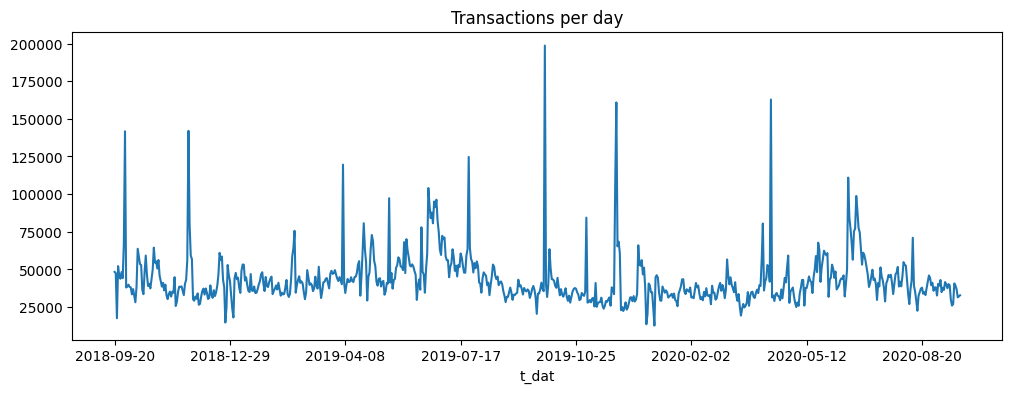

In [ ]:
transactions_train.groupby("t_dat").size().plot(figsize=(12,4), title="Transactions per day")

In [ ]:
last_day = transactions_train["t_dat"].max()
last_week = transactions_train[pd.to_datetime(transactions_train["t_dat"]) >= pd.to_datetime(last_day) - pd.Timedelta(days=6)]
print(last_week["t_dat"].min(), last_week["t_dat"].max())

2020-09-16 2020-09-22


In [ ]:
user_cnt = transactions_train.groupby("customer_id").size()
user_cnt.describe(percentiles=[.5, .7, .9, .95, .99])


,0
count,1.362281e+06
mean,2.333463e+01
std,3.924225e+01
min,1.000000e+00
50%,9.000000e+00
70%,2.100000e+01
90%,6.000000e+01
95%,9.100000e+01
99%,1.870000e+02
max,1.895000e+03


In [ ]:
print(articles.nunique().sort_values(ascending=False))
print(articles.isna().mean().sort_values(ascending=False).head(10))

article_id                      105542
product_code                     47224
prod_name                        45875
detail_desc                      43404
department_no                      299
department_name                    250
product_type_no                    132
product_type_name                  131
section_no                          57
section_name                        56
colour_group_name                   50
colour_group_code                   50
graphical_appearance_no             30
graphical_appearance_name           30
garment_group_no                    21
garment_group_name                  21
perceived_colour_master_id          20
perceived_colour_master_name        20
product_group_name                  19
index_code                          10
index_name                          10
perceived_colour_value_id            8
perceived_colour_value_name          8
index_group_name                     5
index_group_no                       5
dtype: int64
detail_desc 

In [ ]:
print(transactions_train.isna().mean().sort_values(ascending=False).head(10))

t_dat               0.0
customer_id         0.0
article_id          0.0
price               0.0
sales_channel_id    0.0
dtype: float64


In [ ]:
print(customers.isna().mean().sort_values(ascending=False).head(10))

Active                    0.661508
FN                        0.652378
fashion_news_frequency    0.011670
age                       0.011561
club_member_status        0.004418
customer_id               0.000000
postal_code               0.000000
dtype: float64


# Метрика для оценки качества ранжирования: `MAP@12`

In [ ]:
def apk(actual, predicted, k=12):
    if not actual:
        return 0.0
    pred_k = predicted[:k]
    score = 0
    hits = 0
    used = set()
    for i, p in enumerate(pred_k, start=1):
        if p in used:
            continue
        used.add(p)
        if p in actual:
            hits += 1
            score += hits / i
    return score / min(len(actual), k)
def mapk(actual_dict, predicted_dict, k=12):
    sum_apk = 0
    for u, actual in actual_dict.items():
        sum_apk += apk(actual, predicted_dict.get(u, []), k)
    return sum_apk / len(actual_dict)




# Сплит на обучающую и валидационную выборку

In [ ]:
def make_time_split(transactions_train, last_days=7):
    last_day = transactions_train["t_dat"].max()
    valid_start = str(pd.to_datetime(last_day) - pd.Timedelta(days=last_days-1))
    trans = transactions_train.copy()
    val_trans = trans[trans["t_dat"]>=valid_start]
    train_trans = trans[trans["t_dat"]<valid_start]
    return train_trans, val_trans
train_trans, val_trans = make_time_split(transactions_train)
print(train_trans["t_dat"].max(), val_trans["t_dat"].min())

2020-09-16 2020-09-17


# Самый простой подход - рекомендуем всем топ 12 самых популярных товаров

In [ ]:
def global_top_k(train_trans, k=12):
    top = (train_trans['article_id']
           .value_counts()
           .head(k)
           .index
           .astype(int)
           .tolist()
    )
    return top
global_top_k(train_trans)

[706016001,
 706016002,
 372860001,
 610776002,
 759871002,
 464297007,
 372860002,
 610776001,
 399223001,
 720125001,
 706016003,
 156231001]

In [ ]:
def make_predictions_global(sample_customers, global_topk):
    pred = {cid: global_topk for cid in sample_customers.astype(str).tolist()}
    return pred
def make_ground_truth(val_trans):
    g_t = val_trans.groupby("customer_id")["article_id"].apply(lambda s: set(s.astype(int).tolist()))
    return g_t.to_dict()
sample_customers = val_trans["customer_id"].unique()
predicted_dict = make_predictions_global(sample_customers, global_top_k(train_trans))
actual_dict = make_ground_truth(val_trans)
print(mapk(actual_dict, predicted_dict))


0.0027792167874582732


### Результат очень слабый, что ожидаемо (не учитываются вообще предпочтения пользователей)

# Подход чуть сложнее - учитывать последние покупки пользователя и популярные товары

In [ ]:
def make_recent_items(train_trans):
    df = train_trans.sort_values(["customer_id", "t_dat"], ascending=[True, False])[["customer_id", "article_id"]]
    def make_unique(seq):
        used = set()
        uniq = []
        for x in seq.astype(int).tolist():
            if x in used:
                continue
            used.add(x)
            uniq.append(x)
        return uniq
    recent_dict = df.groupby("customer_id")["article_id"].apply(make_unique).to_dict()
    return recent_dict

def make_predictions_recent(sample_customers, recent_dict, global_topk, k=12):
    preds = {}
    for cid in sample_customers:
        preds[cid] = []
        used = set()
        for recent_item in recent_dict.get(cid, []):
            if len(preds[cid]) == k:
                break
            if recent_item in used:
                continue
            preds[cid].append(recent_item)
            used.add(recent_item)
        if len(preds[cid]) < k:
            for popular in global_topk:
                if len(preds[cid]) == k:
                    break
                if popular in used:
                    continue
                used.add(popular)
                preds[cid].append(popular)
    return preds
sample_customers = val_trans['customer_id'].unique()
recent_dict = make_recent_items(train_trans)
predicted_dict = make_predictions_recent(sample_customers, recent_dict, global_top_k(train_trans))
actual_dict = make_ground_truth(val_trans)
print(mapk(actual_dict, predicted_dict))


0.02493420230282875


### Результат уже лучше на порядок

# Преобразование предсказаний в csv-файл

In [ ]:
def preds_to_submission_df(predicted_dict, sample_submission, k=12):
    out = sample_submission.copy()

    def fmt(cid):
        items = predicted_dict.get(cid, [])[:k]
        return " ".join(f"{int(x):010d}" for x in items)

    out["prediction"] = out["customer_id"].map(fmt)
    return out
submission = preds_to_submission_df(predicted_dict, sample_submission)
submission.to_csv("submission.csv", index=False, sep=",")
tmp = pd.read_csv("submission.csv")
print(tmp.columns.tolist())
print(tmp.head(2))

['customer_id', 'prediction']
                                         customer_id  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   

                                          prediction  
0  0568601043 0841260003 0887593002 0890498002 07...  
1  0826211002 0599580055 0811835004 0723529001 05...  


# Теперь попробую implicit feedback

In [ ]:
from scipy.sparse import coo_matrix


In [ ]:
clean_transactions = train_trans.copy()[["customer_id", "article_id"]]
clean_transactions["cnt"] = 1
clean_transactions = (
    clean_transactions.groupby(["customer_id", "article_id"], as_index=False)
    .agg({"cnt": "sum"})
)

### Создаем вспомогательные столбцы

In [ ]:
user_ids = clean_transactions['customer_id'].unique()
item_ids = clean_transactions['article_id'].unique()
user2idx = {u: i for i, u in enumerate(user_ids)}
item2idx = {i: j for j, i in enumerate(item_ids)}
clean_transactions["u"] = clean_transactions["customer_id"].map(user2idx)
clean_transactions["i"] = clean_transactions["article_id"].map(item2idx)

In [ ]:
clean_transactions.head(10)

,customer_id,article_id,cnt,u,i
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,176209023,1,0,0
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601006,2,0,1
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601043,1,0,2
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,607642008,1,0,3
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,625548001,1,0,4
5,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,627759010,1,0,5
6,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,656719005,1,0,6
7,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,694736004,1,0,7
8,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,697138006,1,0,8
9,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,745232001,1,0,9


### Создаем матрицу взаимодействий

In [ ]:
R = coo_matrix(
     (
         clean_transactions["cnt"].values,
         (clean_transactions["u"].values, clean_transactions["i"].values)
     ),
     (len(user_ids), len(item_ids))
 ).tocsr()

In [ ]:
!pip install implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for implicit: filename=implicit-0.7.2-cp312-cp312-linux_x86_64.whl size=933265 sha256=ae4c7fa157e2d483eadd64f570914245f3659569e3b2ed261832f2c6798ae297
  Stored in directory: /root/.cache/pip/wheels/b2/00/4f/9ff8af07a0a53ac6007ea5d739da19cfe147a2df542b6899f8
Successfully built implicit


In [ ]:
from implicit.als import AlternatingLeastSquares
from implicit.gpu.als import AlternatingLeastSquares as GPU_ALS

In [ ]:
print("R:", R.shape, type(R))
R_conf = R * 50

model = AlternatingLeastSquares(factors=64, regularization=0.01, iterations=20, random_state=42)
model.fit(R_conf)

print("model.user_factors:", model.user_factors.shape)
print("model.item_factors:", model.item_factors.shape)

R: (1357359, 103979) <class 'scipy.sparse._csr.csr_matrix'>


  0%|          | 0/20 [00:00<?, ?it/s]

model.user_factors: (1357359, 128)
model.item_factors: (103979, 128)


In [ ]:
val_trans['customer_id'].unique().size

61950

In [ ]:
def make_predictions_IALS(
    customers,
    model,
    R,
    user2idx,
    idx2item,
    global_topk,
    k=12
):
    pred = {}
    for cid in customers:
        recs = []
        if cid in user2idx:
            u = user2idx[cid]
            rec_items, _ = model.recommend(
                userid=u,
                user_items=R[u],
                N=k,
                filter_already_liked_items=True
            )
            recs = [int(idx2item[i]) for i in rec_items]
        # if len(recs) < k:
        #   used = set(recs)
        #   for item in global_topk:
        #       if item not in used:
        #           recs.append(int(item))
        #           used.add(int(item))
        #           if len(recs) == k:
        #               break
        pred[cid] = recs

    return pred
sample_customers = val_trans['customer_id'].unique()
idx2item = {j: a for a, j in item2idx.items()}
predicted_dict = make_predictions_IALS(sample_customers, model, R, user2idx,idx2item, global_top_k(train_trans), 12)
actual_dict = make_ground_truth(val_trans)
print(mapk(actual_dict, predicted_dict))

0.003928414089219996


### Результат неутешительный

# Реализую GRU4Rec

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

### Датасет для предсказания следующего элеменьа последовательности и сэмплер негативных примеров

In [2]:
class NextItemDataset(Dataset):
    def __init__(self, user_seqs, max_seq_len=50, mode="all"):
        self.max_seq_len = max_seq_len
        self.mode = mode
        self.samples = []
        for _, seq in user_seqs.items():
            if len(seq) < 2:
                continue
            if mode == "last":
                for t in range(len(seq)-1):
                    prefix = seq[:t+1]
                    target = seq[t+1]
                    self.samples.append((prefix, target))
            elif mode == "last":
                t = len(seq) - 2
                prefix = seq[:t+1]
                target = seq[t+1]
                self.samples.append((prefix, target))
    def __len__(self):
        return len(self.samples)
    def __getitem__(self, idx):
        prefix, target = self.samples(idx)
        prefix = prefix[-max_seq_len:]
        return torch.tensor(prefix, dtype=torch.long), torch.tensor(target, dtype=torch.long)

class NegSampler:
    def __init__(self, num_items, item_freq, alpha=0.75, p_pop=0.5, seed=42):
        self.num_items = num_items
        self.rng = np.random.default_rng(seed)
        self.p_pop = p_pop

        freq = item_freq[1:].astype(np.float64)
        prob = np.power(freq, alpha)
        prob = prob / prob.sum()
        self.pop_prob = prob

    def sample(self, batch_size: int, k: int) -> torch.Tensor:
        n_pop = int(round(k * self.p_pop))
        n_uni = k - n_pop

        out = np.empty((batch_size, k), dtype=np.int64)
        if n_pop > 0:
            pop = self.rng.choice(self.num_items, size=(batch_size, n_pop), replace=True, p=self.pop_prob) + 1
            out[:, :n_pop] = pop
        if n_uni > 0:
            uni = self.rng.integers(1, self.num_items + 1, size=(batch_size, n_uni), endpoint=False)
            out[:, n_pop:] = uni
        return torch.from_numpy(out)

In [ ]:
class GRU4Rec(nn.Module):
    def __init__(self, num_items, emb_dim=128, hidden_dim=256, num_layers=1, dropout=0.1):
        super().__init__()
        self.num_items = num_items
        self.emb = nn.Embedding(num_items+1, emb_dim, padding_idx=0)
        self.gru = nn.GRU(
            input_size=emb_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            bias=True,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
        )
        self.proj = nn.Linear(hidden_dim, emb_dim, bias=False)
        self.item_bias = nn.Embedding(num_items+1, 1, padding_idx=0)
    def forward_last(self, x, lengths):
        e = self.emb(x)
        packed = nn.utils.rnn.pack_padded_sequence(e, lengths.cpu(), batch_first=True, enforce_sorted=False)
        out_packed, _ = self.gru(packed)
        out, _ = nn.utils.rnn.pad_packed_sequence(out_packed, batch_first=True)
        idx = (lengths - 1).view(-1, 1, 1).expand(-1, 1, out.size(-1))
        h_last = out.gather(1, idx).squeeze(1) # [B, H]
        z = self.proj(h_last)
        return z
    def score_items(self, z, items):
        item_e = self.emb(items)
        if item_e.dim() == 2:
            s = (z * item_e).sum(-1)
        else:
            s = (z.unsqueeze(1) * item_e).sum(-1)
        b = self.item_bias(items).squeeze(-1)
        return s + b